In [1]:
# this is to view the notebook in full with on my screen

from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))



In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import scipy as stats


import datetime

In [3]:
#override default figure sizing
pylab.rcParams['figure.figsize']=(10,6)
sns.set(color_codes = True)

In [4]:
df = pd.read_csv('/home/gaio/Documents/GitHub/iod-linux/DATA/Online Retail Dataset.csv')

### EDA

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 542014 entries, 0 to 542013
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    542014 non-null  object 
 1   StockCode    542014 non-null  object 
 2   Description  540560 non-null  object 
 3   Quantity     542014 non-null  int64  
 4   InvoiceDate  542014 non-null  object 
 5   UnitPrice    542014 non-null  float64
 6   CustomerID   406934 non-null  float64
 7   Country      542014 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,542014.0,9.555285,218.060485,-80995.00,1.00,3.00,10.00,80995.0
UnitPrice,542014.0,4.611339,96.750980,-11062.06,1.25,2.08,4.13,38970.0
CustomerID,406934.0,15287.724582,1713.702628,12346.00,13953.00,15152.00,16791.00,18287.0


### check for null values

In [7]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

##### I wont use CustomerID at this stage

In [8]:
customer_null = df.loc[df['CustomerID'].isnull(),['InvoiceNo','StockCode','CustomerID','Description','Quantity','UnitPrice','Country']]
customer_null.head()
customer_null_World= customer_null[customer_null['Country'] != 'United Kingdom']
customer_null_World_noeire= customer_null_World= customer_null_World[customer_null['Country'] != 'EIRE']

/tmp/ipykernel_91041/3506607088.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  customer_null_World_noeire= customer_null_World= customer_null_World[customer_null['Country'] != 'EIRE']


In [9]:
customer_null_World_noeire.describe()

,CustomerID,Quantity,UnitPrice
count,0.0,769.000000,769.000000
mean,NaN,10.348505,17.363056
std,NaN,13.930379,189.078146
min,NaN,-54.000000,0.190000
25%,NaN,2.000000,1.250000
50%,NaN,6.000000,1.690000
75%,NaN,12.000000,3.750000
max,NaN,144.000000,2653.950000


CustomerID NaN are customers that are not registered

dropping sales with 0 value

In [10]:
sales=df[df['UnitPrice'] !=0]

In [11]:
sales.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,539499.0,9.848863,215.391745,-80995.00,1.00,3.00,10.00,80995.0
UnitPrice,539499.0,4.632836,96.975718,-11062.06,1.25,2.08,4.13,38970.0
CustomerID,406894.0,15287.829818,1713.675405,12346.00,13953.00,15152.00,16791.00,18287.0


In [12]:
sales.isnull().sum()

InvoiceNo           0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     132605
Country             0
dtype: int64

In [13]:
sales.Country.unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

In [14]:
sales.loc[sales['Quantity']>= 24000]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
61724,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,18/01/2011 10:01,1.04,12346.0,United Kingdom
540526,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,09/12/2011 9:15,2.08,16446.0,United Kingdom


In [15]:
print(sales.loc[sales['UnitPrice'] >= 24000])

       InvoiceNo StockCode Description  Quantity       InvoiceDate  UnitPrice  \
222786   C556445         M      Manual        -1  10/06/2011 15:31    38970.0   

        CustomerID         Country  
222786     15098.0  United Kingdom  


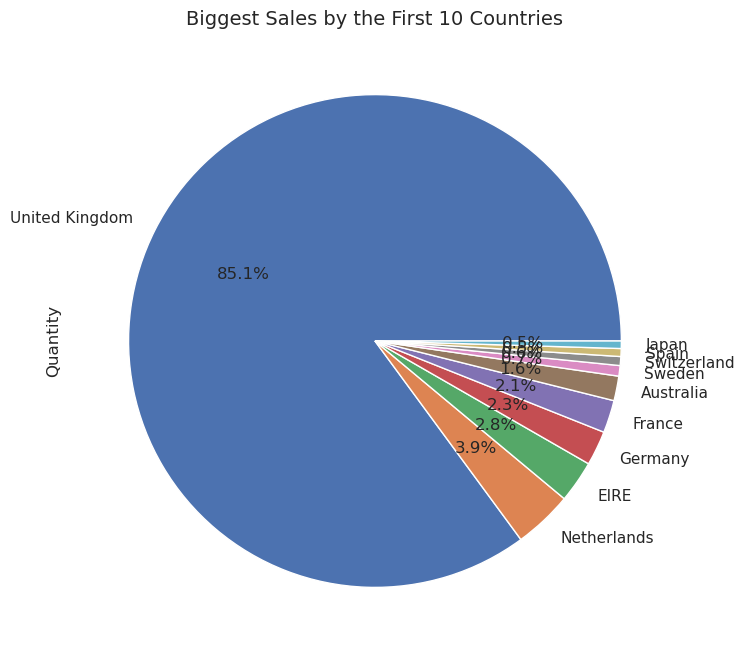

In [16]:
sales.groupby('Country')['Quantity'].sum().sort_values(ascending=False).head(10).plot.pie(autopct="%1.1f%%",figsize=(15, 8))
plt.title('Biggest Sales by the First 10 Countries', size= 14 );


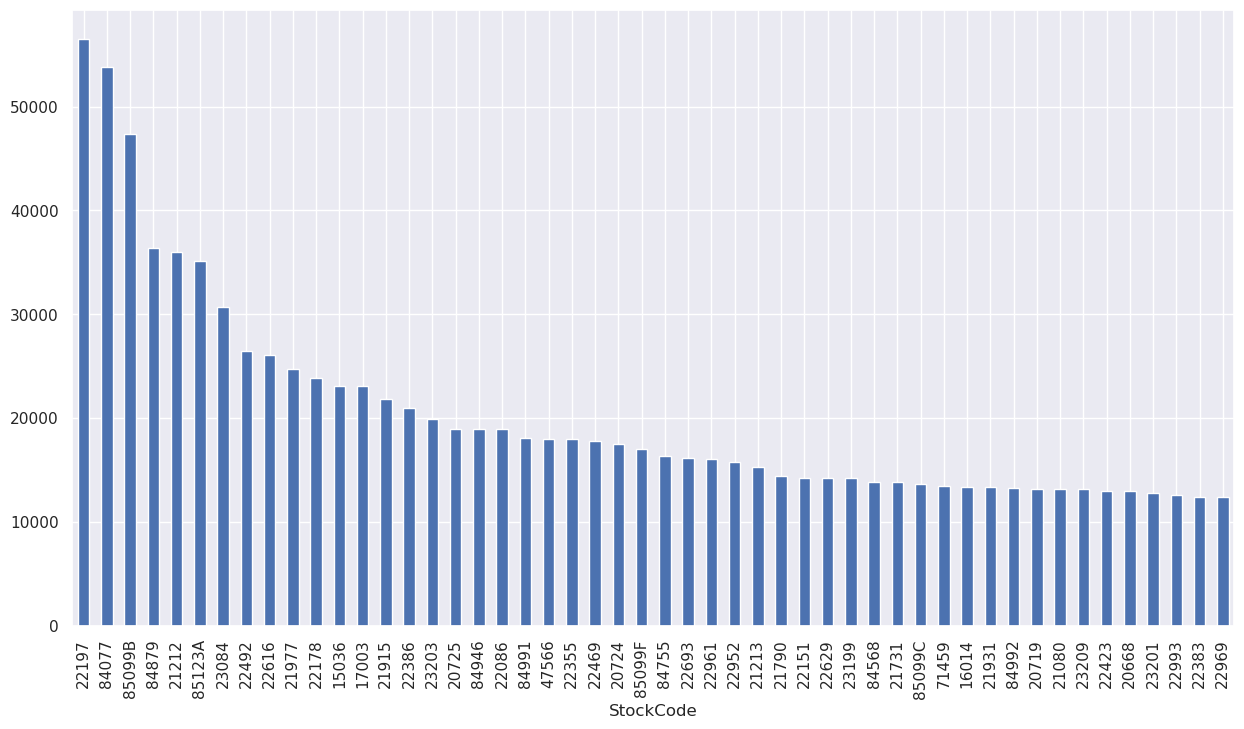

In [17]:
sales.groupby('StockCode')['Quantity'].sum().sort_values(ascending=False).head(50).plot.bar(figsize=(15, 8));

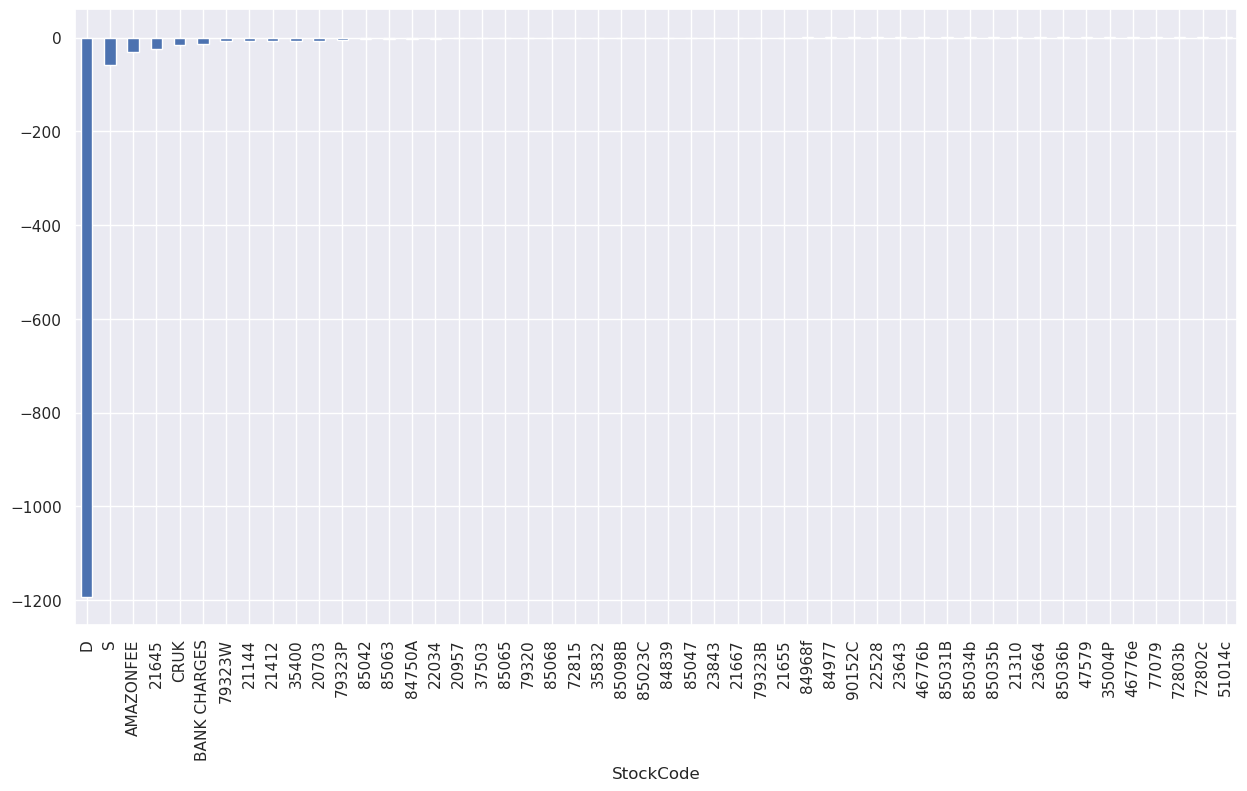

In [18]:
sales.groupby('StockCode')['Quantity'].sum().sort_values(ascending=True).head(50).plot.bar(figsize=(15, 8));

## Date feature engeneering

In [19]:
sales["InvoiceDate"] = pd.to_datetime(sales["InvoiceDate"])

/tmp/ipykernel_91041/3756408872.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales["InvoiceDate"] = pd.to_datetime(sales["InvoiceDate"])


In [20]:
sales['year'] = sales['InvoiceDate'].dt.year
sales['month'] = sales['InvoiceDate'].dt.month_name()
sales['day'] = sales['InvoiceDate'].dt.day
sales['hour'] = sales['InvoiceDate'].dt.hour
sales['week'] = sales['InvoiceDate'].dt.dayofweek

/tmp/ipykernel_91041/2557313684.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales['year'] = sales['InvoiceDate'].dt.year
/tmp/ipykernel_91041/2557313684.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales['month'] = sales['InvoiceDate'].dt.month_name()
/tmp/ipykernel_91041/2557313684.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydat

In [21]:
sales['year_month']=sales['InvoiceDate'].dt.strftime('%Y-%m')

/tmp/ipykernel_91041/1377195523.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales['year_month']=sales['InvoiceDate'].dt.strftime('%Y-%m')


In [22]:
sales.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,year,month,day,hour,week,year_month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 08:26:00,2.55,17850.0,United Kingdom,2010,January,12,8,1,2010-01
1,536365,71053,WHITE METAL LANTERN,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,2010,January,12,8,1,2010-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12 08:26:00,2.75,17850.0,United Kingdom,2010,January,12,8,1,2010-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,2010,January,12,8,1,2010-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,2010,January,12,8,1,2010-01


In [23]:
sales.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
year                    int64
month                  object
day                     int64
hour                    int64
week                    int64
year_month             object
dtype: object



### Add the column which shows 'Amount' which is calucrated by multiplying 'Quantity' with 'UnitPrice'



In [24]:
sales['Amount']=sales['Quantity']*sales['UnitPrice']

/tmp/ipykernel_91041/130209395.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales['Amount']=sales['Quantity']*sales['UnitPrice']


In [25]:
sales.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,year,month,day,hour,week,year_month,Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 08:26:00,2.55,17850.0,United Kingdom,2010,January,12,8,1,2010-01,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,2010,January,12,8,1,2010-01,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12 08:26:00,2.75,17850.0,United Kingdom,2010,January,12,8,1,2010-01,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,2010,January,12,8,1,2010-01,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,2010,January,12,8,1,2010-01,20.34


Question 1 What was the best month for sales each year? how much was earned in that month?

creating two dataframes

In [26]:
sales10 = sales[sales['year'] == 2010]

In [27]:
sales11 = sales[sales['year'] == 2011]

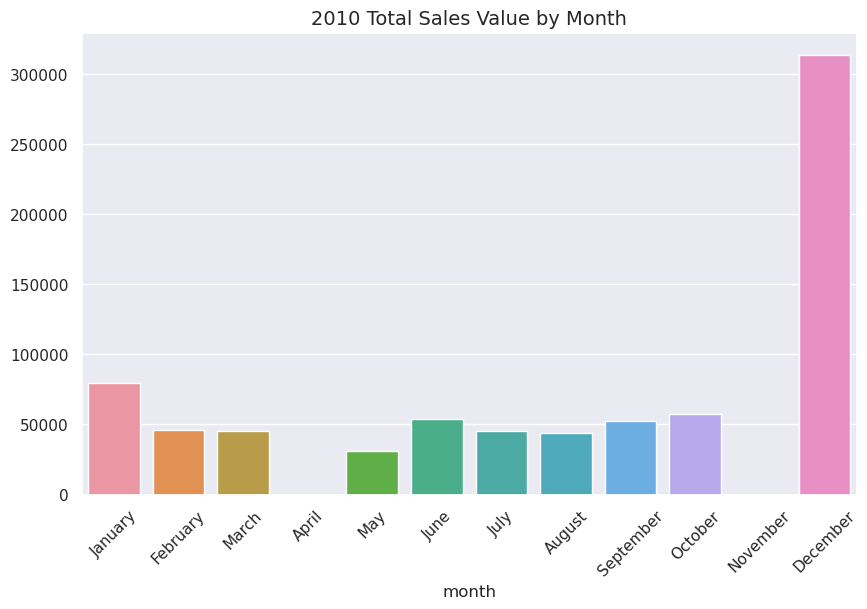

In [28]:
sales_by_month = sales10.groupby('month').sum()['Amount']
sales_by_month = sales_by_month.reindex(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
ax = sns.barplot(x=sales_by_month.index, y=sales_by_month.values)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.title('2010 Total Sales Value by Month', size= 14)
plt.xlabel;

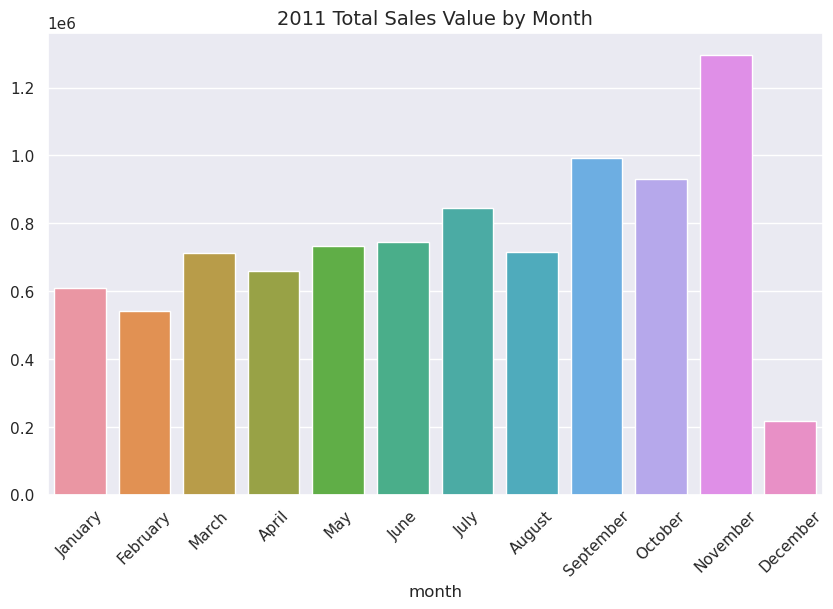

In [29]:
sales_by_month = sales11.groupby('month').sum()['Amount']
sales_by_month = sales_by_month.reindex(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
ax = sns.barplot(x=sales_by_month.index, y=sales_by_month.values)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.title('2011 Total Sales Value by Month', size= 14)
plt.xlabel;

In [30]:
result10 = sales10.groupby('Country').sum()['Amount']
print(result10)

Country
Australia            1278.70
Austria               257.04
Bahrain               205.74
Belgium              1809.91
Channel Islands       363.53
Cyprus               1590.82
Denmark              1281.50
EIRE                 9029.95
Finland               892.80
France               9635.05
Germany             14562.84
Iceland               711.79
Israel               -227.44
Italy                 794.50
Japan                7705.07
Lithuania            1661.06
Netherlands          8784.48
Norway               3787.12
Poland                248.16
Portugal             2380.12
Spain                1843.73
Sweden               2646.30
Switzerland          1304.92
United Kingdom     697279.46
Name: Amount, dtype: float64


In [31]:
result11 = sales11.groupby('Country').sum()['Amount']
print(result11)

Country
Australia                136072.170
Austria                    9897.280
Bahrain                     342.660
Belgium                   39101.050
Brazil                     1143.600
Canada                     3666.380
Channel Islands           19722.760
Cyprus                    11355.470
Czech Republic              707.720
Denmark                   17486.640
EIRE                     254246.870
European Community         1291.750
Finland                   21433.940
France                   187828.540
Germany                  207135.370
Greece                     4710.520
Hong Kong                 10117.040
Iceland                    3598.210
Israel                     8135.260
Italy                     16096.010
Japan                     27635.550
Lebanon                    1693.880
Malta                      2505.470
Netherlands              275877.060
Norway                    31376.340
Poland                     6964.980
Portugal                  26986.900
RSA                 

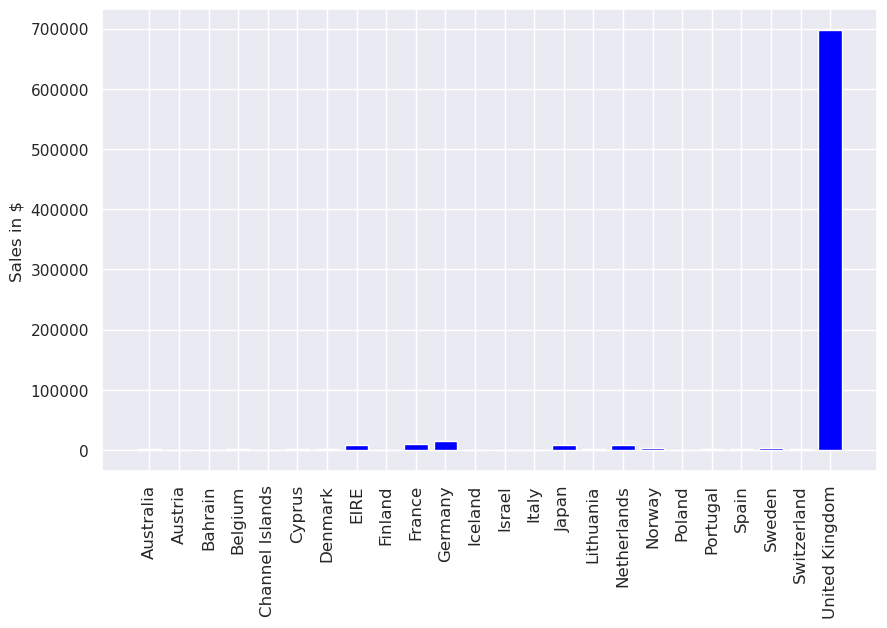

In [32]:
Country = [Country for Country, df in sales10.groupby('Country')]
plt.bar(Country,result10, color="blue")
plt.xticks(Country,rotation= 'vertical', size = 12)
plt.ylabel('Sales in $')
plt.show()


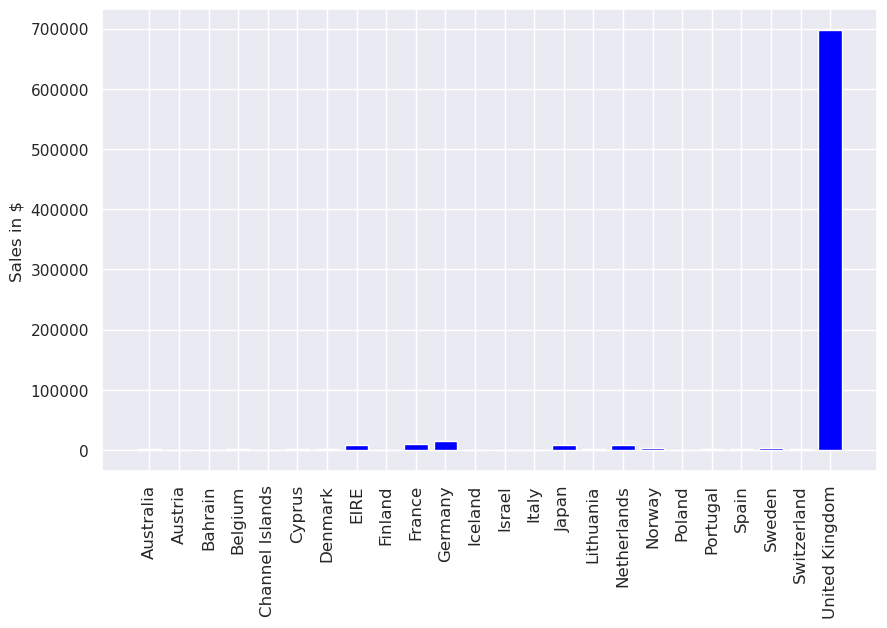

In [33]:
Country = [Country for Country, df in sales10.groupby('Country')]
plt.bar(Country,result10, color="blue")
plt.xticks(Country,rotation= 'vertical', size = 12)
plt.ylabel('Sales in $')
plt.show()


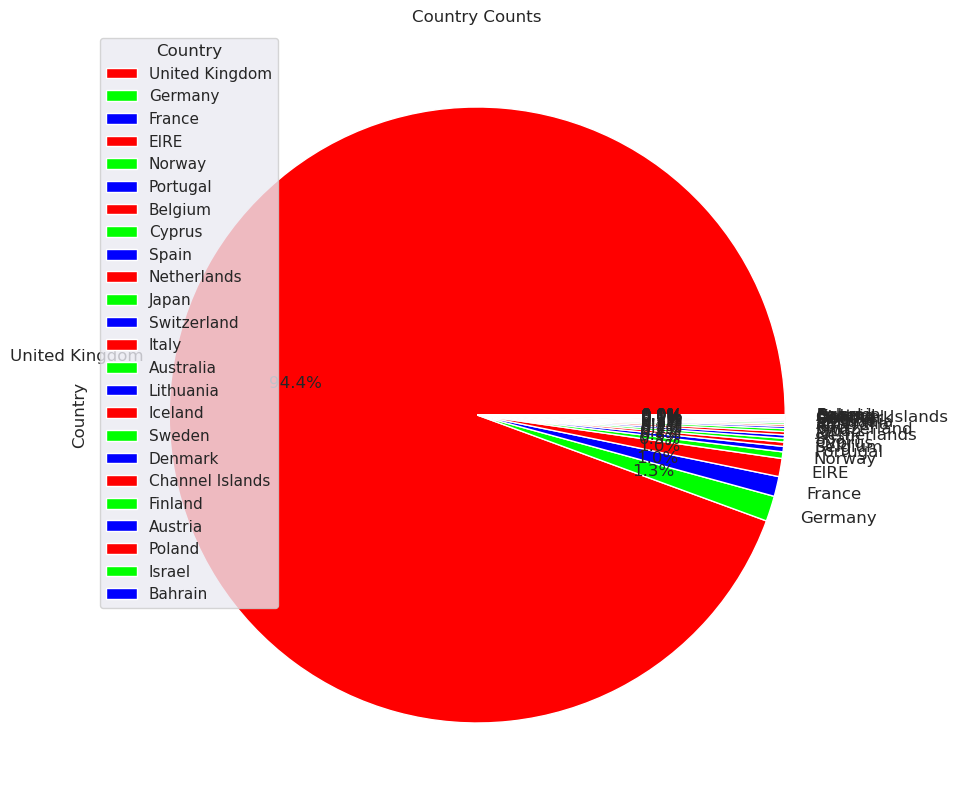

In [34]:
country_counts = sales10['Country'].value_counts()
country_counts.plot(kind='pie', autopct='%1.1f%%', colors=['#ff0000', '#00ff00', '#0000ff'], fontsize=12, figsize=(15,10))
plt.title('Country Counts')
plt.legend(title='Country')
plt.show()


In [35]:
result10.head()

Country
Australia          1278.70
Austria             257.04
Bahrain             205.74
Belgium            1809.91
Channel Islands     363.53
Name: Amount, dtype: float64

In [36]:
sales10.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,year,month,day,hour,week,year_month,Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 08:26:00,2.55,17850.0,United Kingdom,2010,January,12,8,1,2010-01,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,2010,January,12,8,1,2010-01,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12 08:26:00,2.75,17850.0,United Kingdom,2010,January,12,8,1,2010-01,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,2010,January,12,8,1,2010-01,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,2010,January,12,8,1,2010-01,20.34


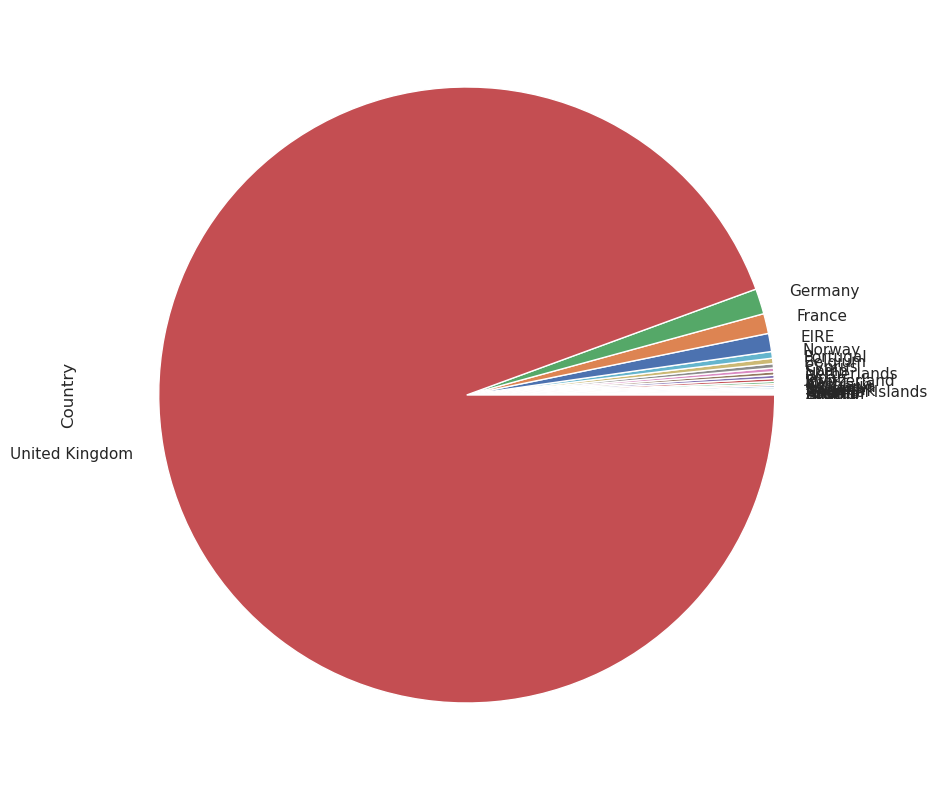

In [37]:
sales10['Country'].value_counts().sort_values().plot(kind = 'pie', figsize = (15,10));

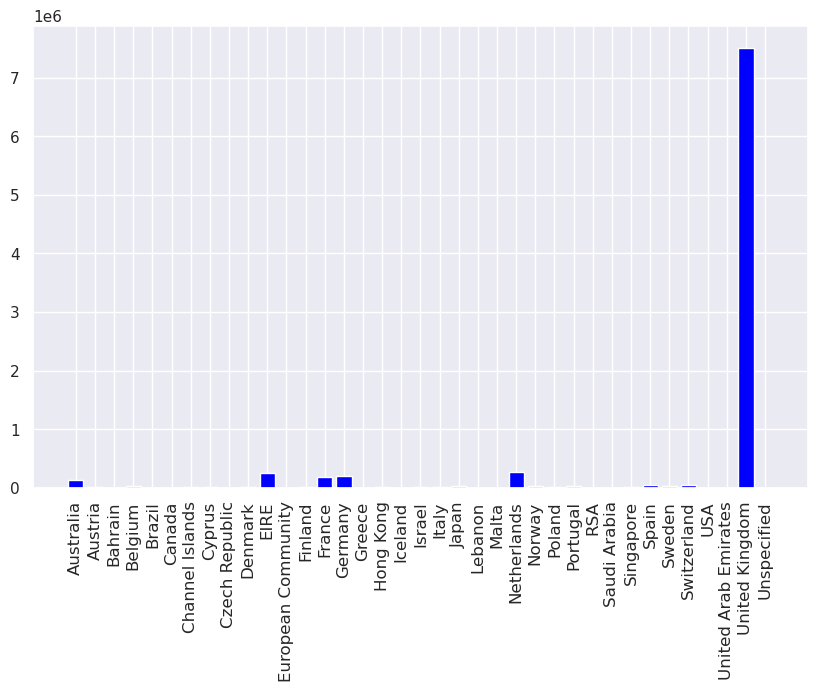

In [38]:
Country = [Country for Country, df in sales11.groupby('Country')]
plt.bar(Country, result11, color="blue")
plt.xticks(Country, rotation = 'vertical', size = 12)
plt.show()

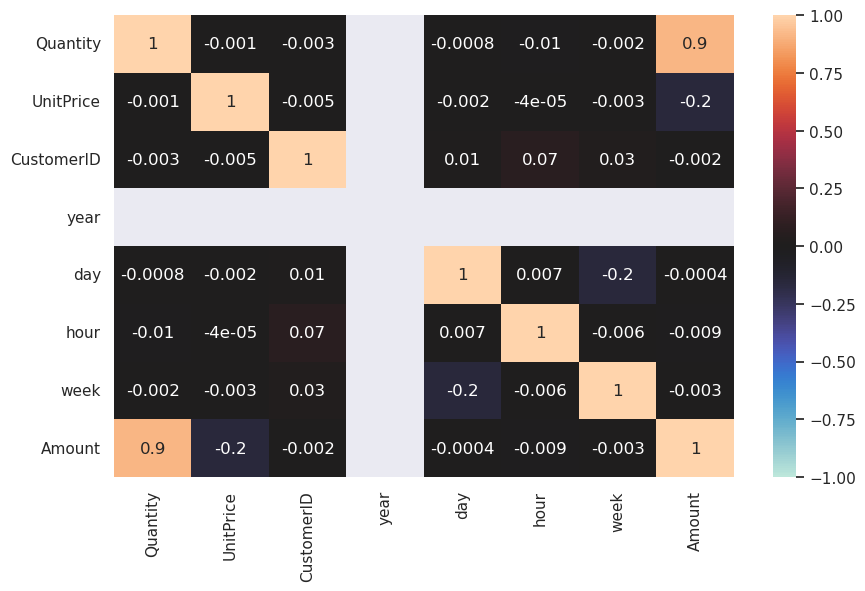

In [60]:
sns.heatmap(sales11.corr(), fmt='.1g', annot=True, vmin=-1, vmax=1, center=0);

### when are the busiest times for selling the products?

In [39]:
sales10 = sales[sales['year'] == 2010]

In [40]:
salesgb10 = sales10[sales['Country'] == 'United kingdom']

/tmp/ipykernel_91041/4011400351.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  salesgb10 = sales10[sales['Country'] == 'United kingdom']


In [41]:
salesgb10 = sales10[sales['Country'] == 'United kingdom']

/tmp/ipykernel_91041/4011400351.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  salesgb10 = sales10[sales['Country'] == 'United kingdom']


In [42]:
salesgb10.describe()


,Quantity,UnitPrice,CustomerID,year,day,hour,week,Amount
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


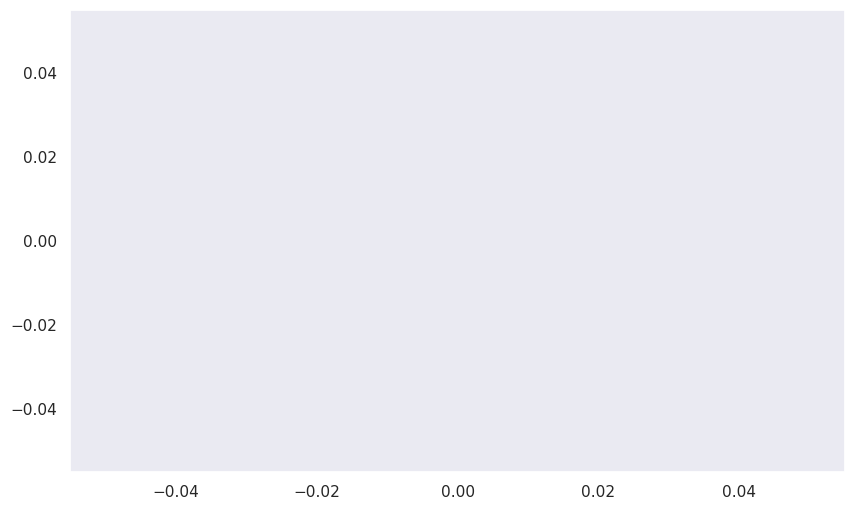

In [43]:
hours = [hour for hour, df in salesgb10.groupby('hour')]

plt.plot(hours,salesgb10.groupby(['hour']).count())
plt.grid();


In [44]:
hours = [hour for hour, df in salesgb11.groupby('hour')]

plt.plot(hours,salesgb11.groupby(['hour']).count())
plt.grid();

NameError: name 'salesgb11' is not defined

1:01 https://www.youtube.com/watch?v=eMOA1pPVUc4&t=260s

### what products are most often sold togheder?

In [ ]:
salesd = sales[sales['InvoiceNo'].duplicated(keep=False)]
salesd['grouped'] = salesd.groupby('InvoiceNo')['Description'].transform(lambda x: ',' .join(x))
salesd = salesd[['InvoiceNo','grouped']].drop_duplicates()
salesd.head()

### Define Hypothesis
h0= there is no difference between sales in the morning between sales in the afternoon
ha= there is difference between sales in the mornin and in sales in the afternoon

In [61]:
salesgbmsample = salesgb10[salesgb10['hour']<=1 2].sample(100, random_state=40)
salesgasample = salesgb10[salesgb10['hour']>=12].sample(100, random_state=40)


ValueError: a must be greater than 0 unless no samples are taken

In [ ]:
N= 100
a= salesgbmsample['hour']
b= salesgbasample['hour']


alpha

In [ ]:
aplha = 0.05

In [ ]:
a= salesgb10sample['hour']
b= salesgb11sample['hour']

In [ ]:
## Calculate the variance to get the standard deviation
var_a = a.var(ddof = 1)
var_b = b.var(ddof = 1)

## Calculate the Standard Deviation
s = np.sqrt((var_a + var_b)/2)

In [ ]:
t = (a.mean() - b.mean())/(s*np.sqrt(2/N))
print(t)

In [ ]:
## Compare with the critical t-value
## Degrees of freedom
df = 2*N - 2

#p-value after comparison with the t 
if (t > 0):
    p = 1 - stats.t.cdf(t, df = df) 
else:
    p = stats.t.cdf(t, df = df)